In [1]:
import sklearn

from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.covariance import EmpiricalCovariance, EllipticEnvelope, GraphicalLasso, MinCovDet
from sklearn.neural_network import BernoulliRBM
from skelm import ELMClassifier
# from umap import UMAP


# from sklearn.utils import all_estimators
# classifiers = all_estimators(type_filter="classifier")


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.metrics import confusion_matrix

import random
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn_image as isns

sns.set_style("darkgrid")
isns.set_image(origin="upper")

from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor

from utils import CustomImageDataset

In [2]:
label_names = {0: "tree", 1:"sun", 2:"fish", 3:"bird", 4:"flower"}

In [3]:
train_dataset = CustomImageDataset("./data/train_data.csv")
test_dataset = CustomImageDataset("./data/test_data.csv")

input_train_matrix, target_train_matrix = train_dataset.as_matrix()
input_test_matrix, target_test_matrix = test_dataset.as_matrix()

input_full_matrix = np.concatenate([input_train_matrix, input_test_matrix])
target_full_matrix = np.concatenate([target_train_matrix, target_test_matrix])

In [4]:
print(input_full_matrix.shape)
print(input_train_matrix.shape)
print(input_test_matrix.shape)

(15000, 28, 28)
(12000, 28, 28)
(3000, 28, 28)


In [5]:
subset_data = input_full_matrix[target_full_matrix == 2, :, :]

## Gaussian Mixture Model

In [6]:
build_pipe = lambda c: Pipeline([
    ('flatten', FunctionTransformer(lambda x: x.reshape(x.shape[0], -1))),
    ('scaler', MinMaxScaler()),
    ('generator', c)
])

In [7]:
gmm_model = build_pipe(GaussianMixture(n_components = 10, covariance_type="full"))
gmm_model.fit(subset_data)

Pipeline(steps=[('flatten',
                 FunctionTransformer(func=<function <lambda>.<locals>.<lambda> at 0x7f525671d120>)),
                ('scaler', MinMaxScaler()),
                ('generator', GaussianMixture(n_components=10))])

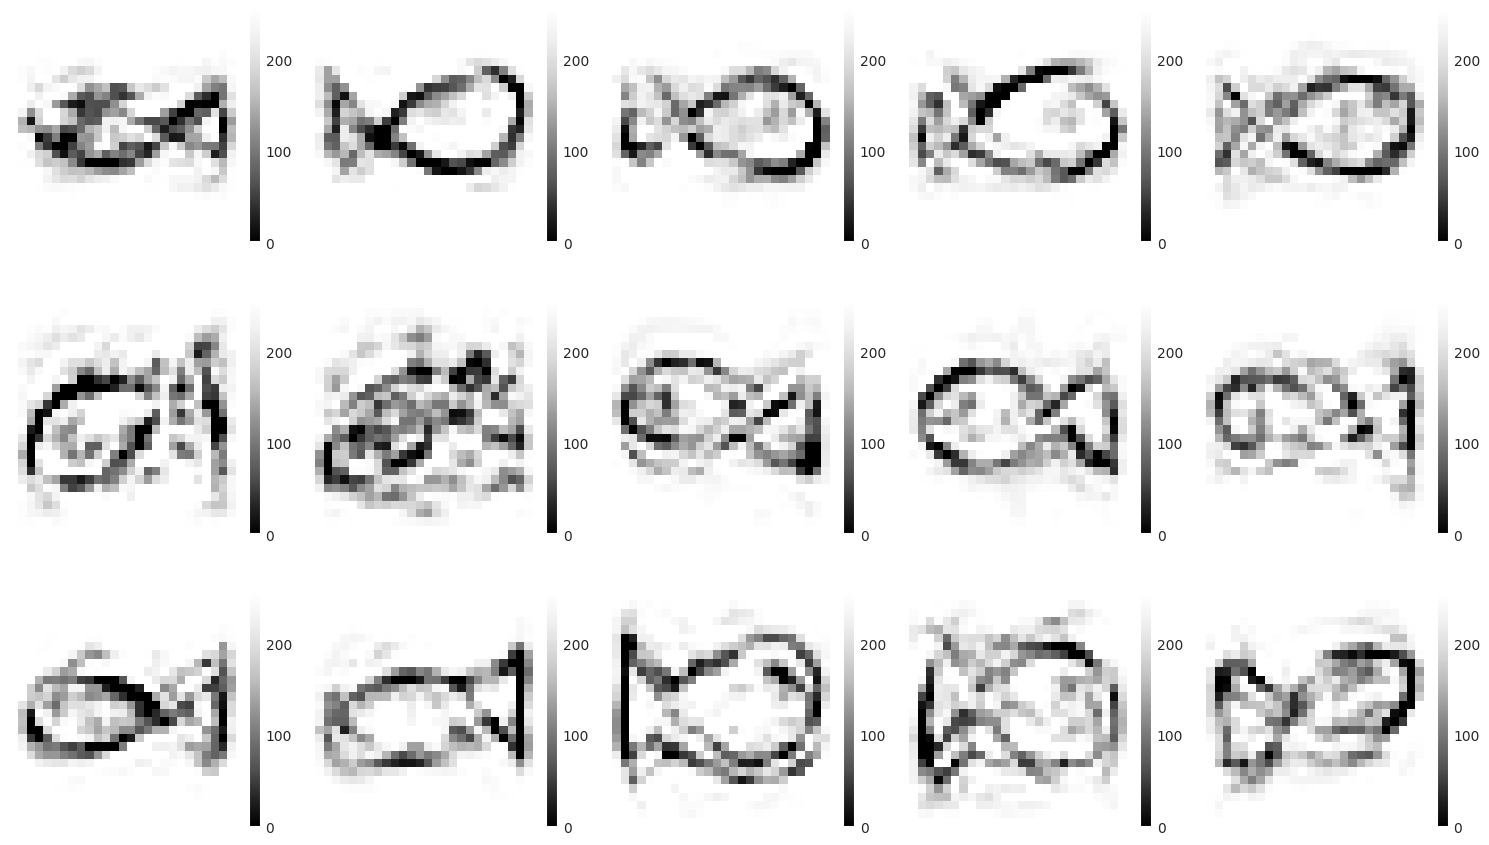

In [8]:
n_images = 15
random_img = gmm_model[2].sample(n_images)[0]
random_img = gmm_model[1].inverse_transform(random_img)
random_img = random_img.reshape([-1,28,28]).transpose((1,2,0))


isns.ImageGrid(random_img, cmap="Greys_r", col_wrap=5, vmin=0, vmax=255)
plt.show()

In [9]:
pca_components = 25

build_pipe = lambda c: Pipeline([
    ('flatten', FunctionTransformer(lambda x: x.reshape(x.shape[0], -1))),
    ('scaler', MinMaxScaler()),
    ('dim_reduce', PCA(n_components=pca_components)),
    ('generator', c)
])

In [10]:
gmm_model_pca = build_pipe(GaussianMixture(n_components = 10, covariance_type="full"))
gmm_model_pca.fit(subset_data)

Pipeline(steps=[('flatten',
                 FunctionTransformer(func=<function <lambda>.<locals>.<lambda> at 0x7f524901af80>)),
                ('scaler', MinMaxScaler()),
                ('dim_reduce', PCA(n_components=25)),
                ('generator', GaussianMixture(n_components=10))])

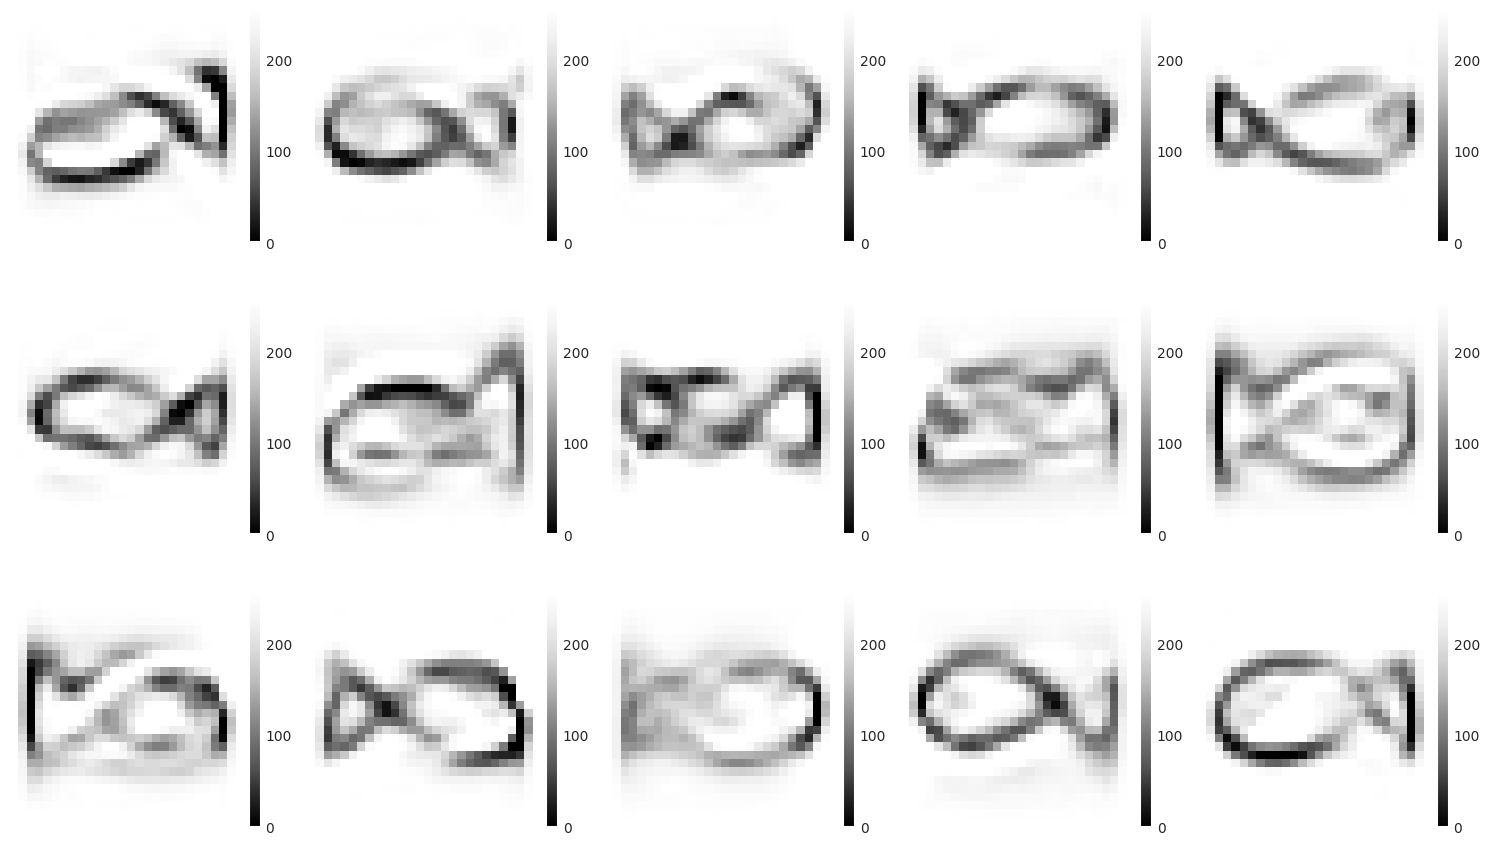

In [11]:
n_images = 15
random_img = gmm_model_pca[-1].sample(n_images)[0]
random_img = gmm_model_pca[2].inverse_transform(random_img)
random_img = gmm_model_pca[1].inverse_transform(random_img)
random_img = random_img.reshape([-1,28,28]).transpose((1,2,0))

isns.ImageGrid(random_img, cmap="Greys_r", col_wrap=5, vmin=0, vmax=255)
plt.show()

In [12]:
full_data = input_full_matrix

In [13]:
build_pipe = lambda c: Pipeline([
    ('flatten', FunctionTransformer(lambda x: x.reshape(x.shape[0], -1))),
    ('scaler', MinMaxScaler()),
    ('generator', c)
])

In [14]:
gmm_model = build_pipe(GaussianMixture(n_components = 15, covariance_type="full"))
gmm_model.fit(full_data)

Pipeline(steps=[('flatten',
                 FunctionTransformer(func=<function <lambda>.<locals>.<lambda> at 0x7f524901b0a0>)),
                ('scaler', MinMaxScaler()),
                ('generator', GaussianMixture(n_components=15))])

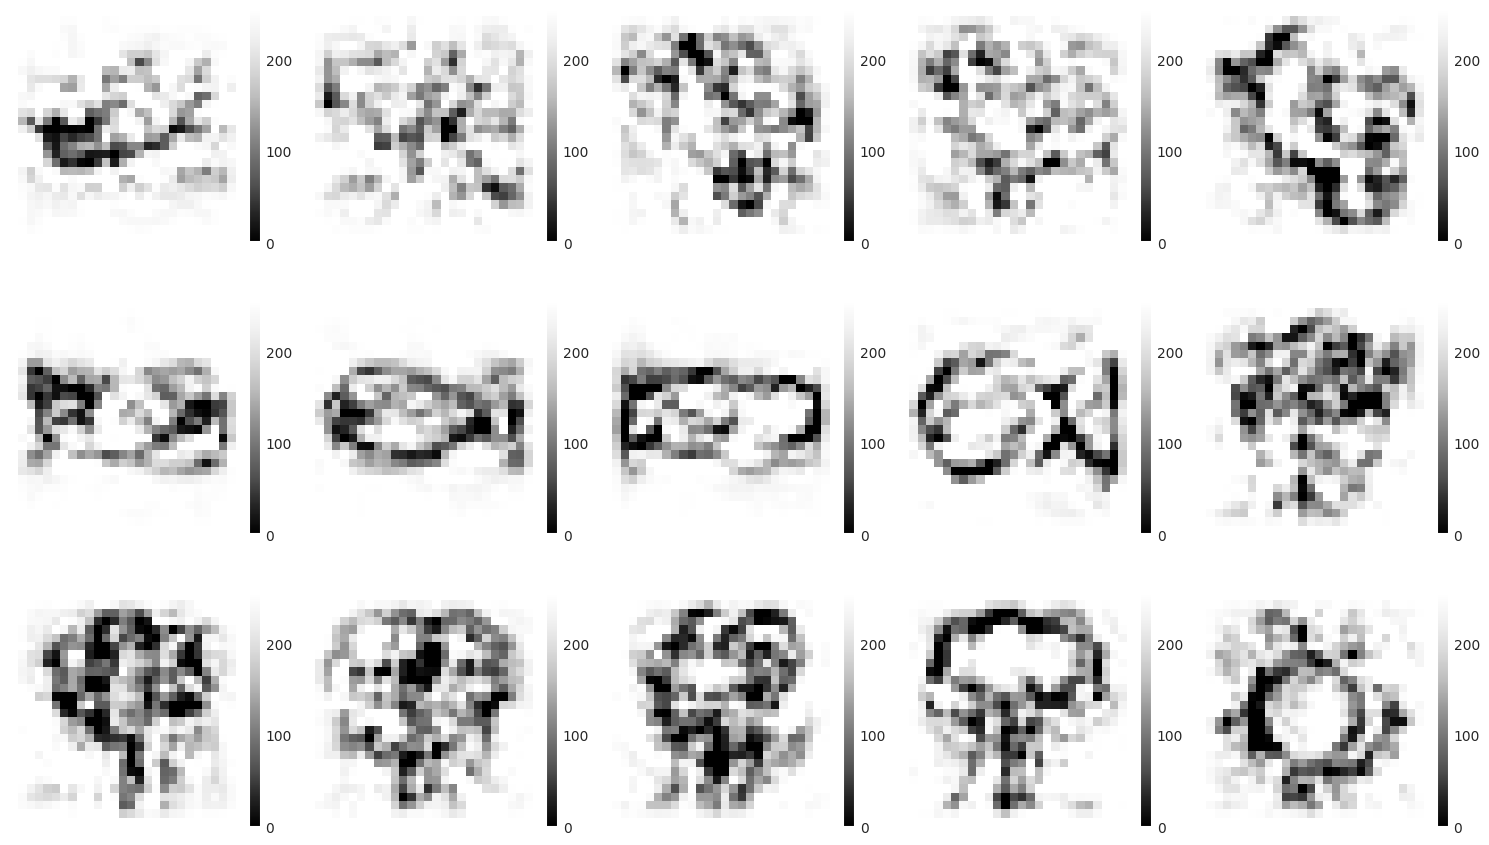

In [15]:
n_images = 15
random_img = gmm_model[2].sample(n_images)[0]
random_img = gmm_model[1].inverse_transform(random_img)
random_img = random_img.reshape([-1,28,28]).transpose((1,2,0))


isns.ImageGrid(random_img, cmap="Greys_r", col_wrap=5, vmin=0, vmax=255)
plt.show()

In [16]:
pca_components = 40

build_pipe = lambda c: Pipeline([
    ('flatten', FunctionTransformer(lambda x: x.reshape(x.shape[0], -1))),
    ('scaler', MinMaxScaler()),
    ('dim_reduce', PCA(n_components=pca_components)),
    ('generator', c)
])

In [17]:
gmm_model_pca = build_pipe(GaussianMixture(n_components = 15, covariance_type="full"))
gmm_model_pca.fit(full_data)

Pipeline(steps=[('flatten',
                 FunctionTransformer(func=<function <lambda>.<locals>.<lambda> at 0x7f520f292200>)),
                ('scaler', MinMaxScaler()),
                ('dim_reduce', PCA(n_components=40)),
                ('generator', GaussianMixture(n_components=15))])

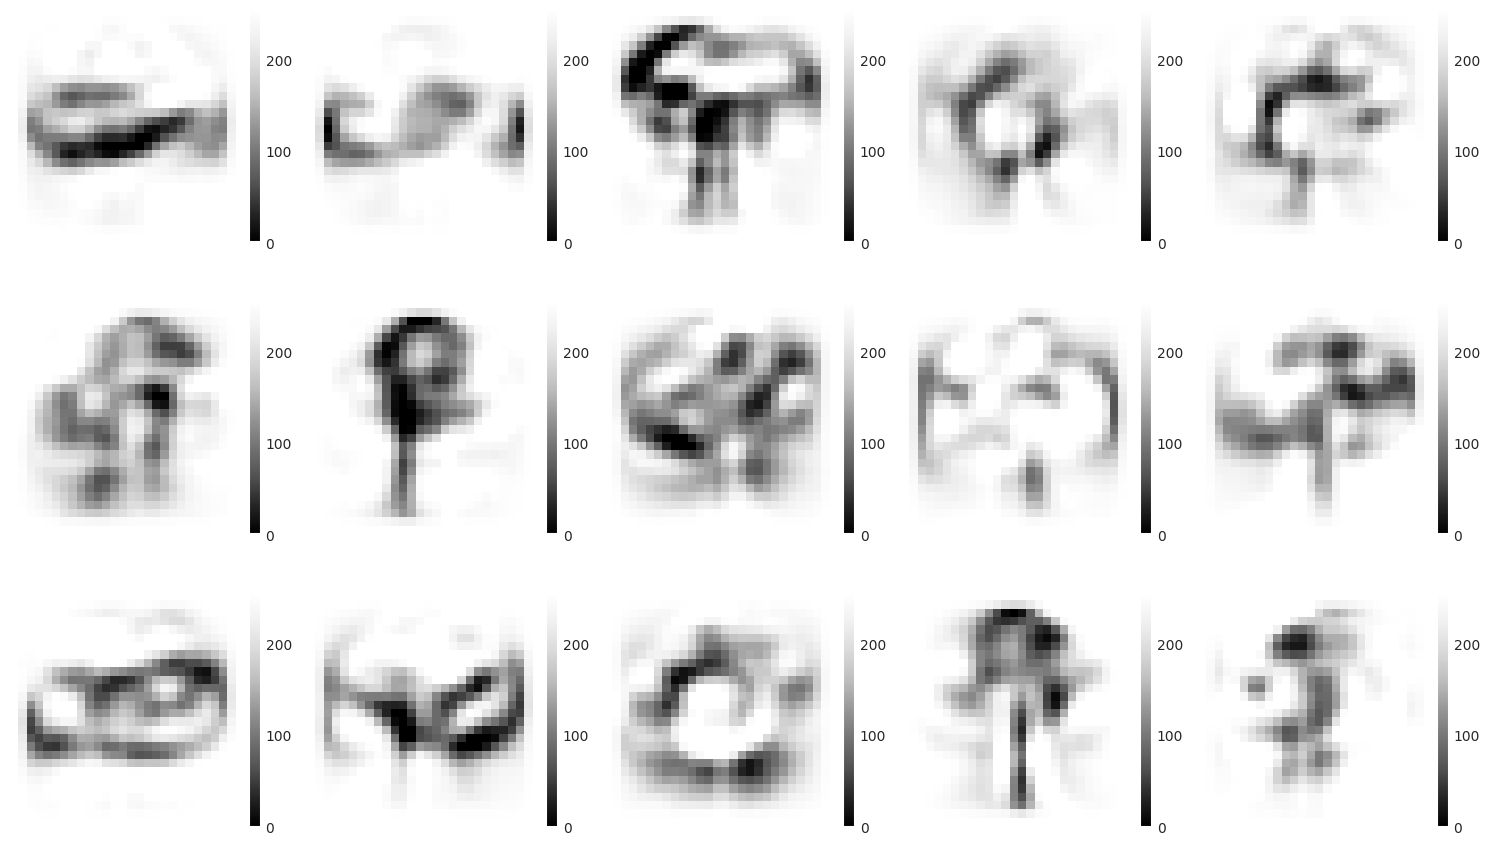

In [18]:
n_images = 15
random_img = gmm_model_pca[-1].sample(n_images)[0]
random_img = gmm_model_pca[2].inverse_transform(random_img)
random_img = gmm_model_pca[1].inverse_transform(random_img)
random_img = random_img.reshape([-1,28,28]).transpose((1,2,0))

isns.ImageGrid(random_img, cmap="Greys_r", col_wrap=5, vmin=0, vmax=255)
plt.show()

# RBM Generator 

In [19]:
pca_components = 40

build_pipe = lambda c: Pipeline([
    ('flatten', FunctionTransformer(lambda x: x.reshape(x.shape[0], -1))),
    ('scaler', MinMaxScaler()),
    ('generator', c)
])


In [20]:
n_components = 128

rbm_model = build_pipe(BernoulliRBM(n_components=n_components))
rbm_model.fit(full_data)

Pipeline(steps=[('flatten',
                 FunctionTransformer(func=<function <lambda>.<locals>.<lambda> at 0x7f520f2920e0>)),
                ('scaler', MinMaxScaler()),
                ('generator', BernoulliRBM(n_components=128))])

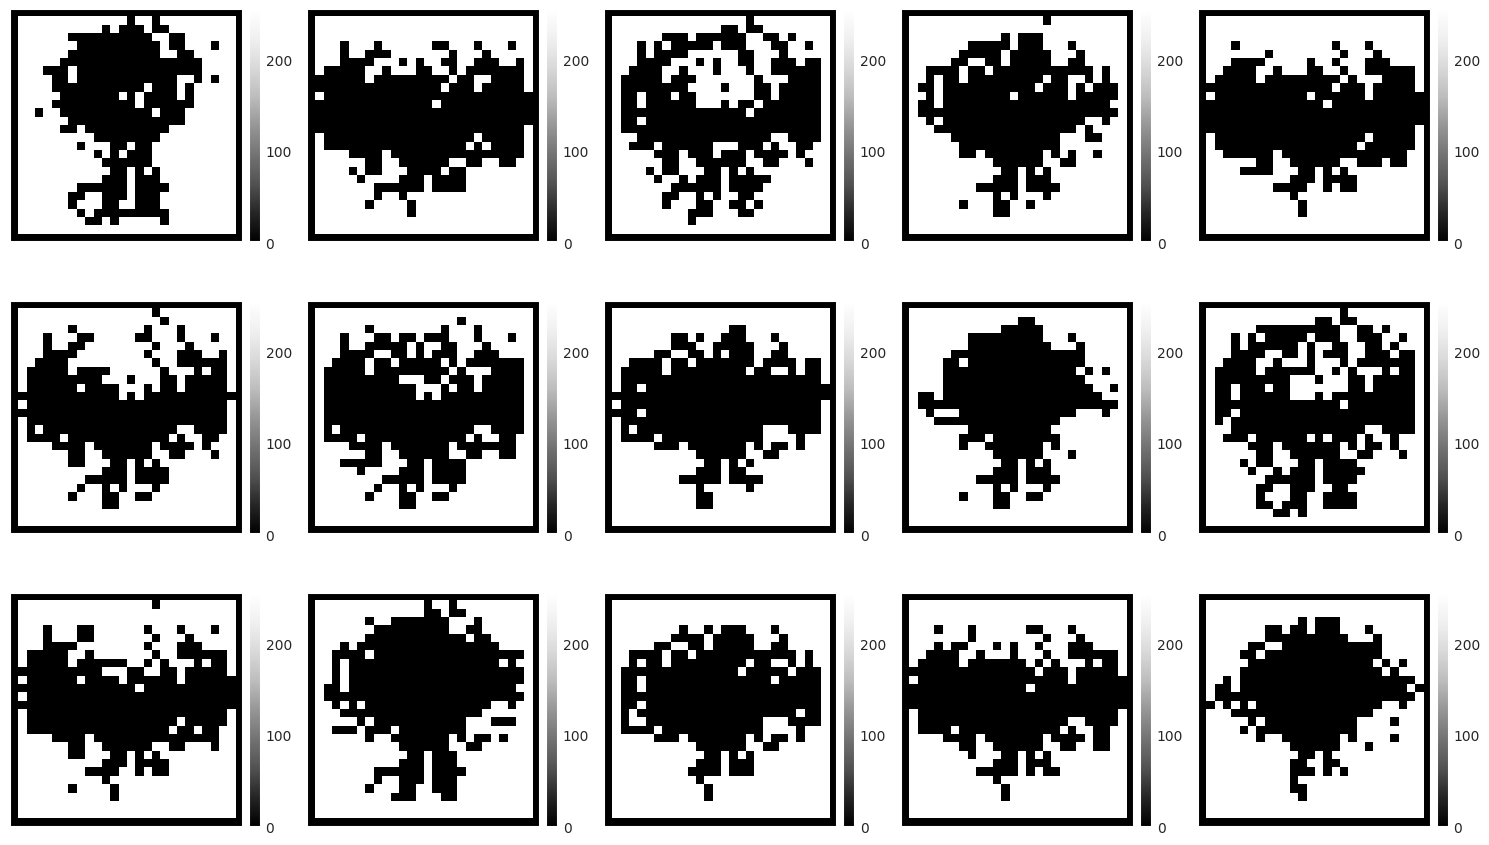

In [21]:
n_images = 15
random_img = rbm_model[-1]._sample_visibles(np.random.uniform(0,256,[n_images,n_components]), np.random.RandomState()).astype(int)
# random_img = rbm_model[2].inverse_transform(random_img)
# random_img = rbm_model[1].inverse_transform(random_img)
random_img = random_img.reshape([-1,28,28]).transpose((1,2,0))*256

isns.ImageGrid(random_img, cmap="Greys_r", col_wrap=5, vmin=0, vmax=255)
plt.show()

In [22]:
pca_components = 60

build_pipe = lambda c: Pipeline([
    ('flatten', FunctionTransformer(lambda x: x.reshape(x.shape[0], -1))),
    ('scaler', MinMaxScaler()),
    ('dim_reduce', PCA(n_components=pca_components)),
    ('generator', c)
])


In [23]:
n_components = 30

rbm_model = build_pipe(BernoulliRBM(n_components=n_components))
rbm_model.fit(full_data)

Pipeline(steps=[('flatten',
                 FunctionTransformer(func=<function <lambda>.<locals>.<lambda> at 0x7f5249214280>)),
                ('scaler', MinMaxScaler()),
                ('dim_reduce', PCA(n_components=60)),
                ('generator', BernoulliRBM(n_components=30))])

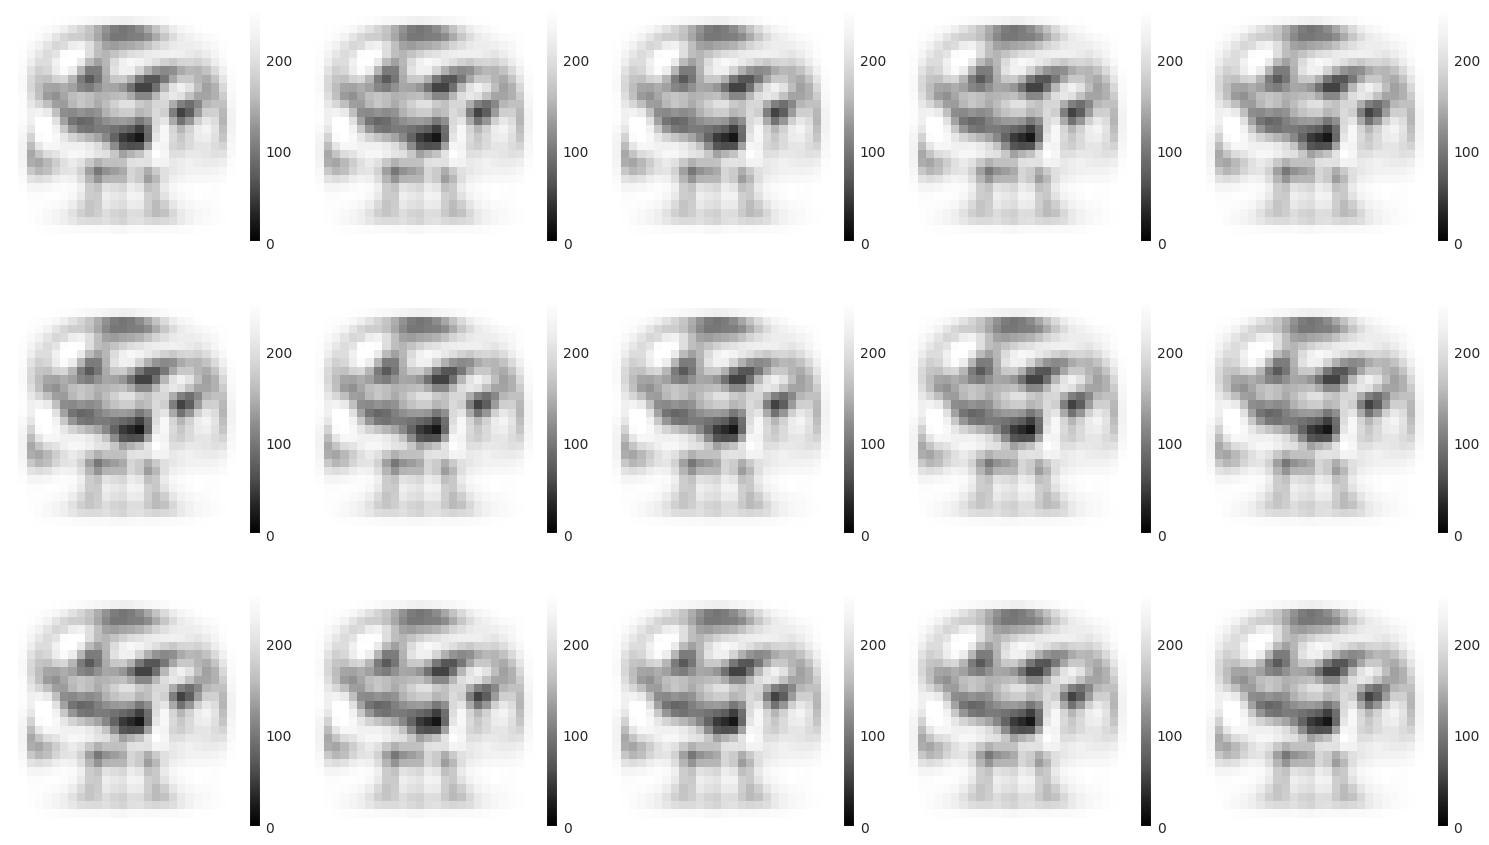

In [24]:
n_images = 15
random_img = rbm_model[-1]._sample_visibles(np.random.uniform(0,256,[n_images,n_components]), np.random.RandomState()).astype(int)
random_img = rbm_model[2].inverse_transform(random_img)
random_img = rbm_model[1].inverse_transform(random_img)
random_img = random_img.reshape([-1,28,28]).transpose((1,2,0))

isns.ImageGrid(random_img, cmap="Greys_r", col_wrap=5, vmin=0, vmax=255)
plt.show()

# Naive Bayes Classifier as generator

In [25]:
def sample_nb(nb_model, class_n, sigma_scaler=1, k=1):
    mean = nb_model.theta_[class_n, :]
    sigma = np.sqrt(nb_model.var_[class_n, :])*sigma_scaler

    distribution = scipy.stats.norm(mean, sigma)
    return np.array([distribution.rvs() for i in range(k)])

In [26]:
build_pipe = lambda c: Pipeline([
    ('flatten', FunctionTransformer(lambda x: x.reshape(x.shape[0], -1))),
    ('scaler', MinMaxScaler()),
    ('classifier', c)
])

nb_pipe = build_pipe(GaussianNB(var_smoothing=1e-4))

nb_fitted = nb_pipe.fit(input_train_matrix, target_train_matrix)

(25, 784)


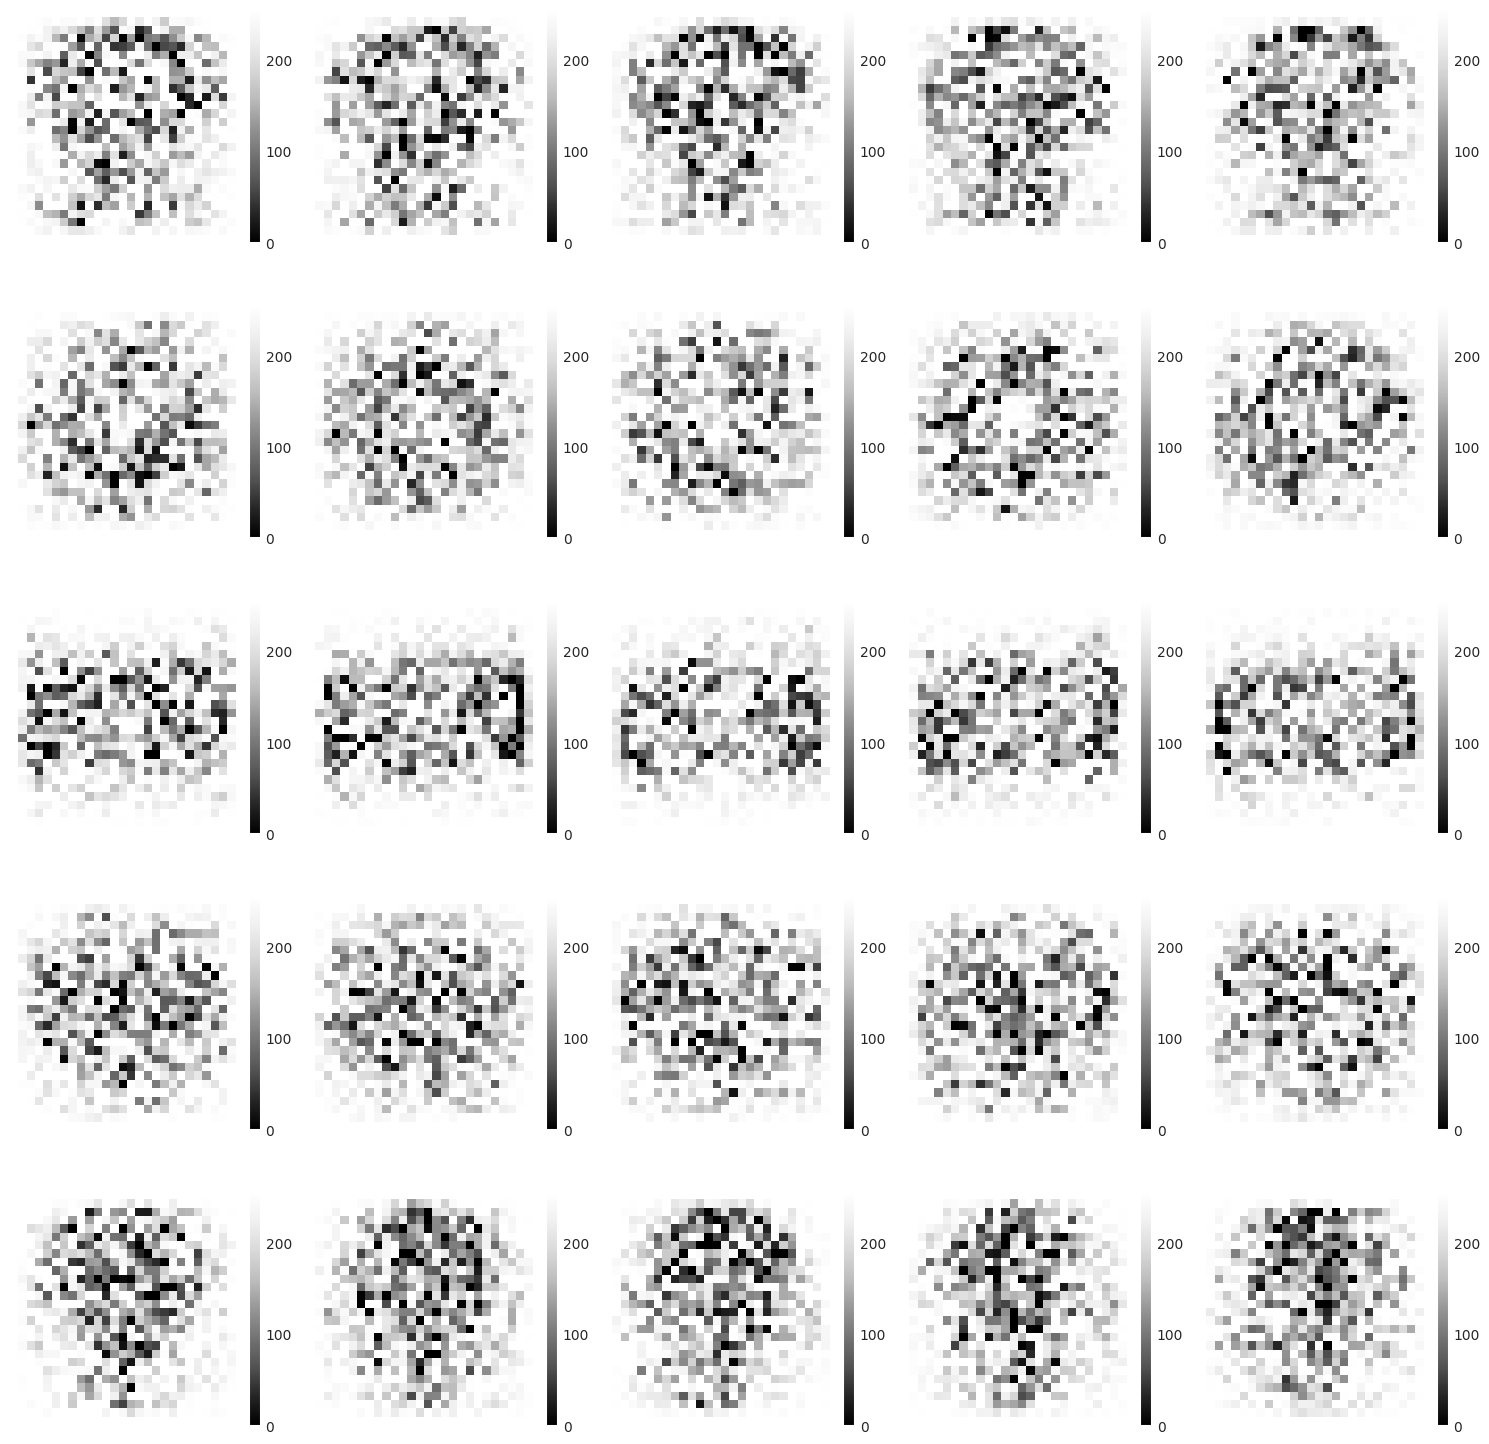

In [27]:
n_images_per_class = 5

random_img = []
for class_n in label_names:
    random_img += [i for i in sample_nb(nb_fitted[-1], class_n, sigma_scaler=1, k=n_images_per_class)]

random_img = np.asarray(random_img)
print(random_img.shape)

random_img = nb_fitted[1].inverse_transform(random_img)
random_img = random_img.reshape([-1,28,28]).transpose((1,2,0))

isns.ImageGrid(random_img, cmap="Greys_r", col_wrap=n_images_per_class, vmin=0, vmax=255)
plt.show()

In [28]:
pca_components = 40

build_pipe = lambda c: Pipeline([
    ('flatten', FunctionTransformer(lambda x: x.reshape(x.shape[0], -1))),
    ('scaler', MinMaxScaler()),
    ('dim_reduce', PCA(n_components=pca_components)),
    ('classifier', c)
])

nb_pipe = build_pipe(GaussianNB(var_smoothing=1e-9))

nb_fitted = nb_pipe.fit(input_train_matrix, target_train_matrix)

(25, 40)


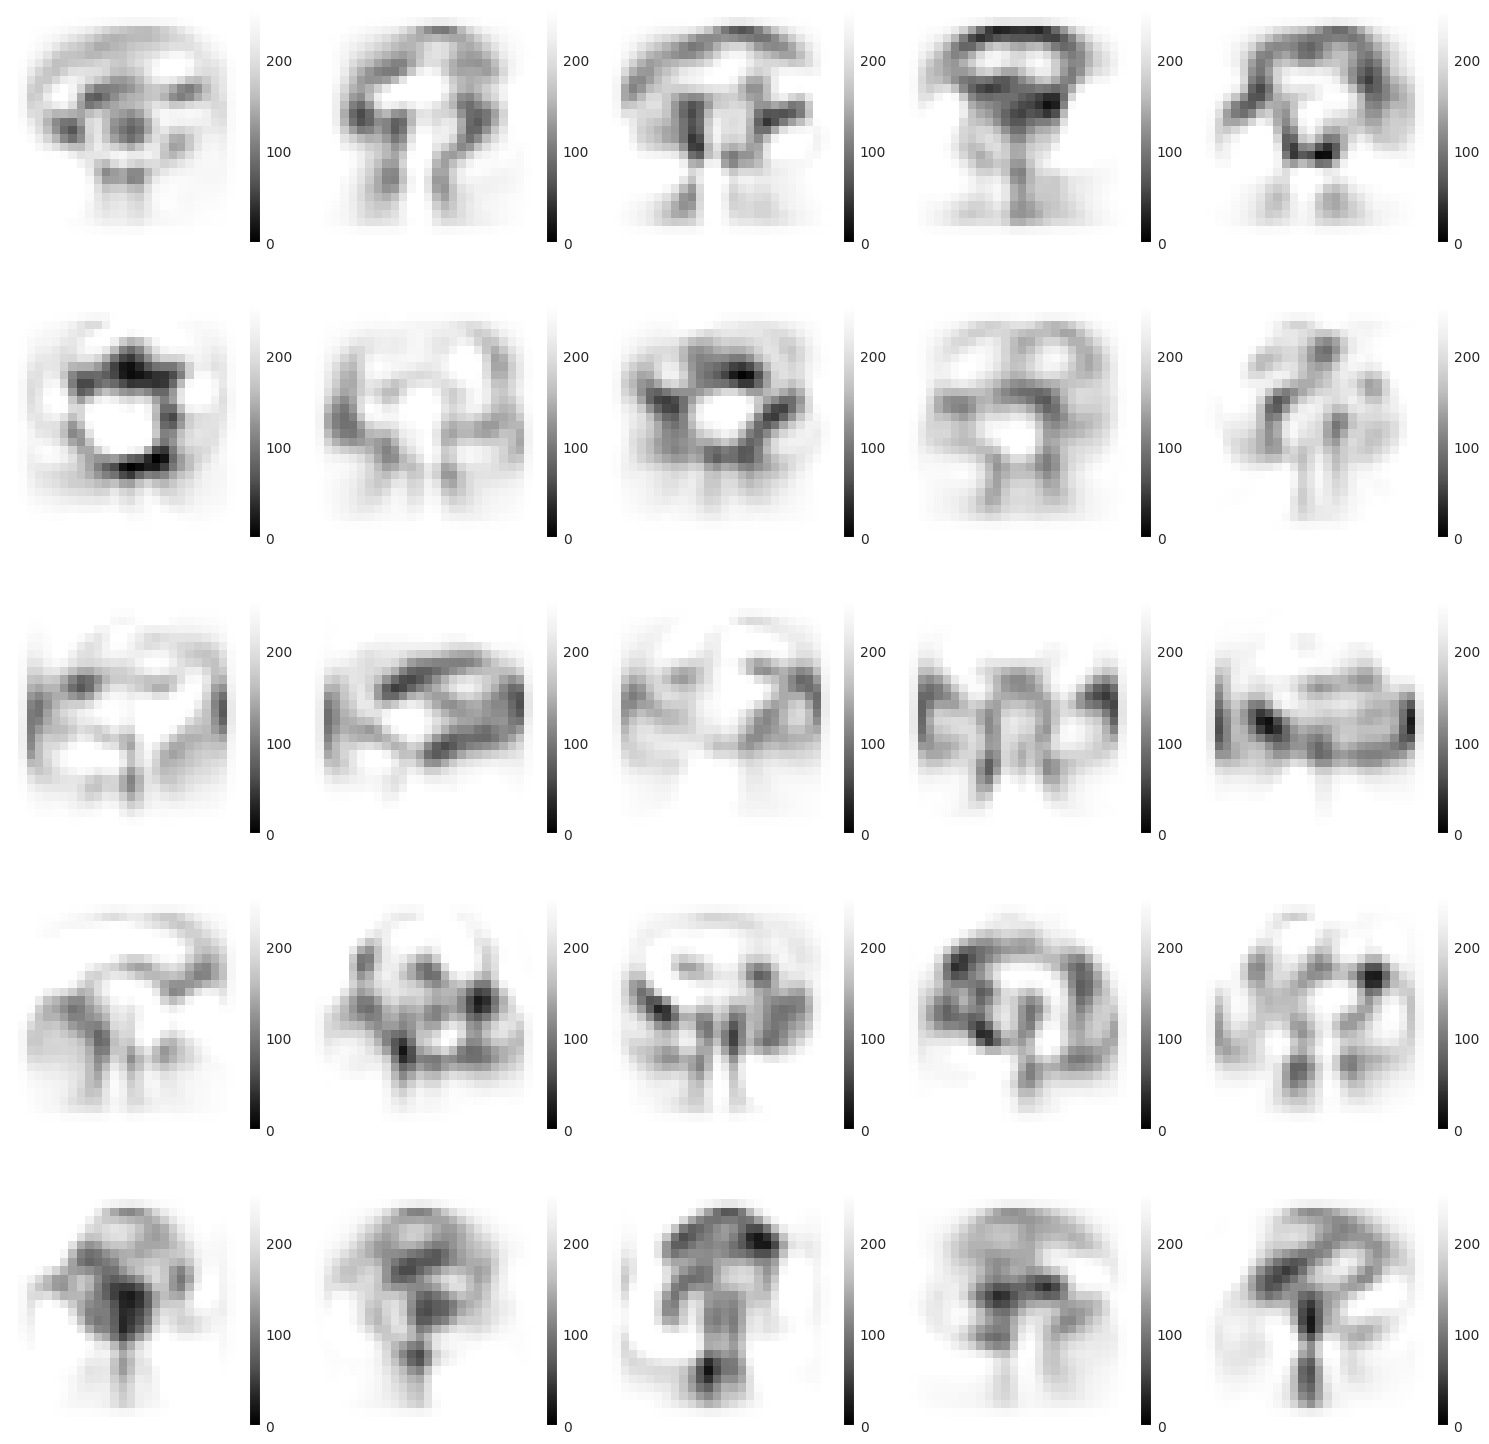

In [29]:
n_images_per_class = 5

random_img = []
for class_n in label_names:
    random_img += [i for i in sample_nb(nb_fitted[-1], class_n, sigma_scaler=0.75, k=n_images_per_class)]

random_img = np.asarray(random_img)
print(random_img.shape)

random_img = nb_fitted[2].inverse_transform(random_img)
random_img = nb_fitted[1].inverse_transform(random_img)
random_img = random_img.reshape([-1,28,28]).transpose((1,2,0))

isns.ImageGrid(random_img, cmap="Greys_r", col_wrap=n_images_per_class, vmin=0, vmax=255)
plt.show()

# QDA as generator

In [55]:
def sample_qda(lda_model, class_n, sigma_scaler=1, k=1, idx=0):
    mean = lda_model.means_[class_n, :]
    #sigma = np.sqrt(naive_bayes_model.var_[class_n, :])*sigma_scaler
    sigma = lda_model.covariance_[idx] * sigma_scaler

    distribution = scipy.stats.multivariate_normal(mean, sigma, allow_singular=True)
    return np.array([distribution.rvs() for i in range(k)])

/home/eugeniolr/anaconda3/envs/ml310/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


(784, 784)
(5, 784)


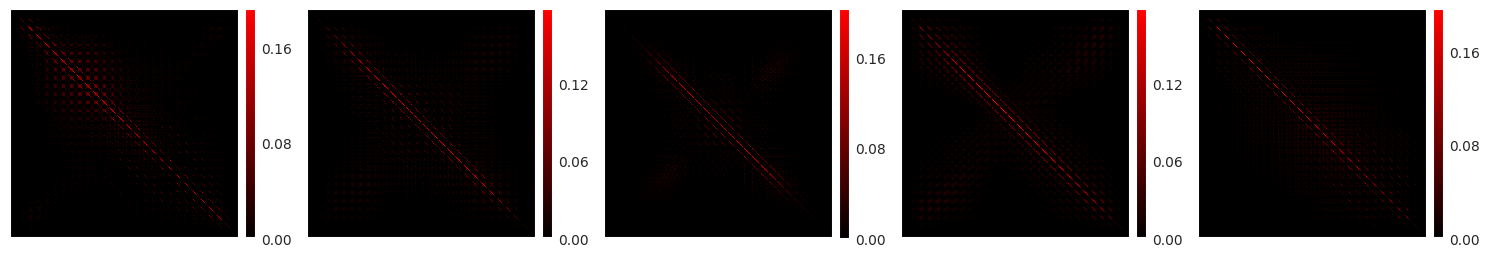

In [89]:
build_pipe = lambda c: Pipeline([
    ('flatten', FunctionTransformer(lambda x: x.reshape(x.shape[0], -1))),
    ('scaler', MinMaxScaler()),
    ('classifier', c)
])

# lda_pipe = build_pipe(LinearDiscriminantAnalysis(covariance_estimator=EmpiricalCovariance(), solver="lsqr"))
lda_pipe = build_pipe(QuadraticDiscriminantAnalysis(store_covariance=True, reg_param=0.01))

lda_fitted = lda_pipe.fit(input_train_matrix, target_train_matrix)

# fig, ax = plt.subplots(1,1,figsize=(10,10))
print(lda_fitted[-1].covariance_[0].shape)
print(lda_fitted[-1].means_.shape)
# isns.imgplot(lda_fitted[-1].covariance_[0], ax=ax, vmin=0, cmap="R")
isns.ImageGrid(lda_fitted[-1].covariance_, vmin=0, cmap="R", col_wrap=5)

(25, 784)


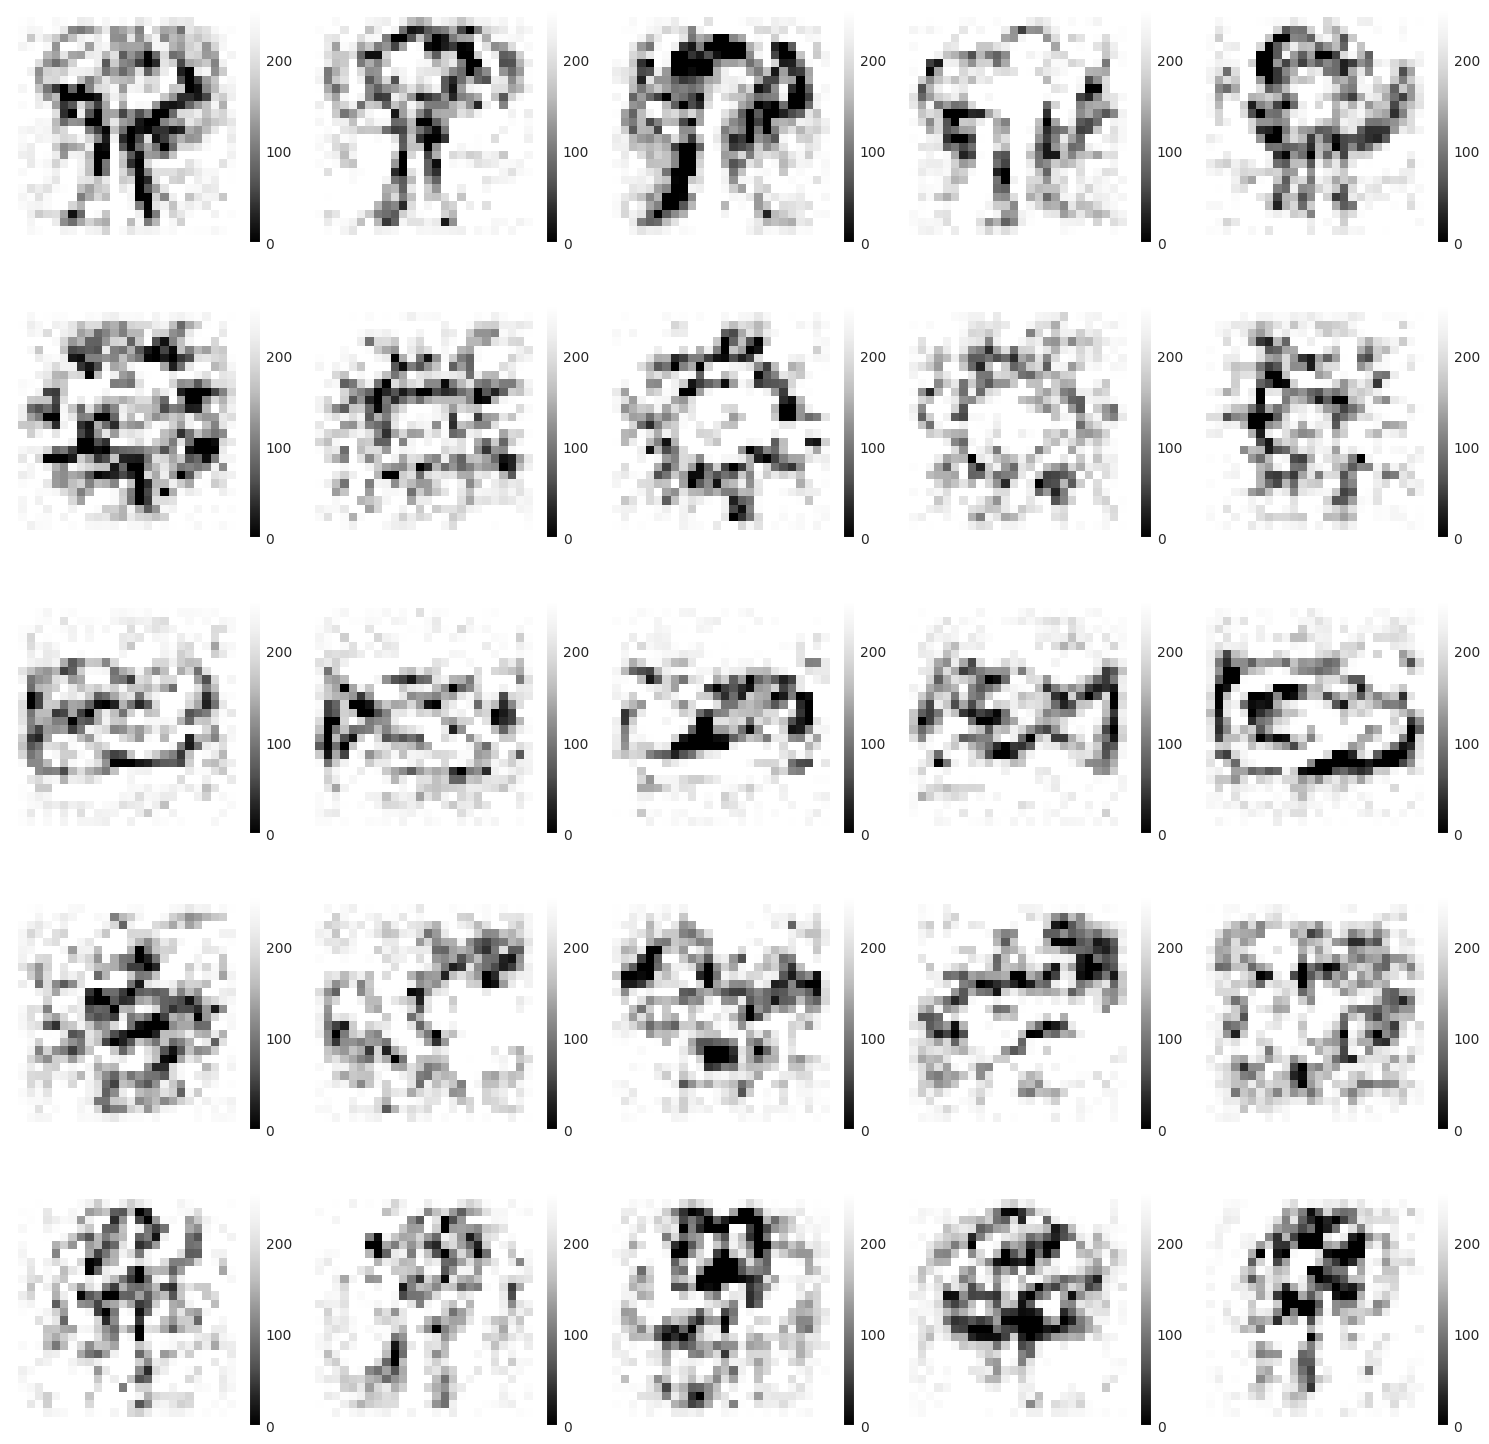

In [86]:
n_images_per_class = 5

random_img = []
for class_n in label_names:
    random_img += [i for i in sample_qda(lda_fitted[-1], class_n, sigma_scaler=1, k=n_images_per_class, idx=class_n)]

random_img = np.asarray(random_img)
print(random_img.shape)


random_img = lda_fitted[1].inverse_transform(random_img)
random_img = random_img.reshape([-1,28,28]).transpose((1,2,0))

isns.ImageGrid(random_img, cmap="Greys_r", col_wrap=n_images_per_class, vmin=0, vmax=255)
plt.show()

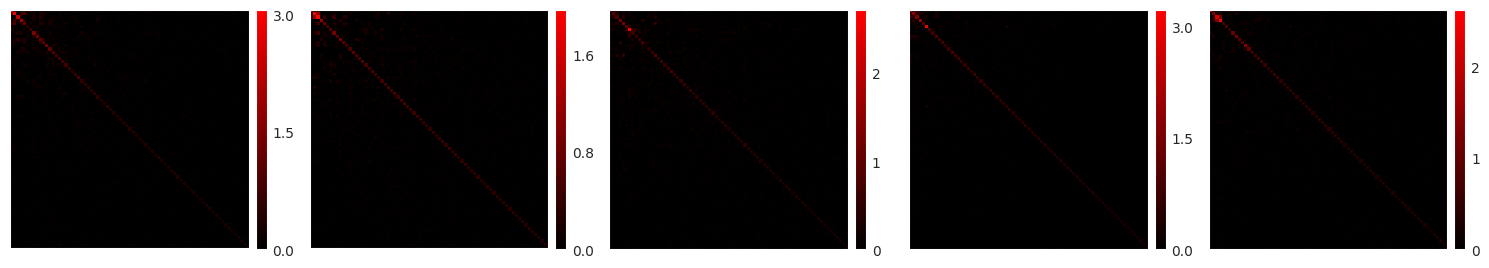

In [95]:
pca_components = 75

build_pipe = lambda c: Pipeline([
    ('flatten', FunctionTransformer(lambda x: x.reshape(x.shape[0], -1))),
    ('scaler', MinMaxScaler()),
    ('dim_reduce', PCA(pca_components)),
    ('classifier', c)
])

# lda_pipe = build_pipe(LinearDiscriminantAnalysis(covariance_estimator=EmpiricalCovariance(), solver="lsqr"))
# lda_pipe = build_pipe(LinearDiscriminantAnalysis(covariance_estimator=EllipticEnvelope(), solver="lsqr"))
# lda_pipe = build_pipe(LinearDiscriminantAnalysis(covariance_estimator=GraphicalLasso(), solver="eigen"))
lda_pipe = build_pipe(QuadraticDiscriminantAnalysis(store_covariance=True))


lda_fitted = lda_pipe.fit(input_train_matrix, target_train_matrix)

# isns.imgplot(lda_fitted[-1].covariance_, vmin=0, cmap="R")
isns.ImageGrid(lda_fitted[-1].covariance_, vmin=0, cmap="R", col_wrap=5)

(25, 75)


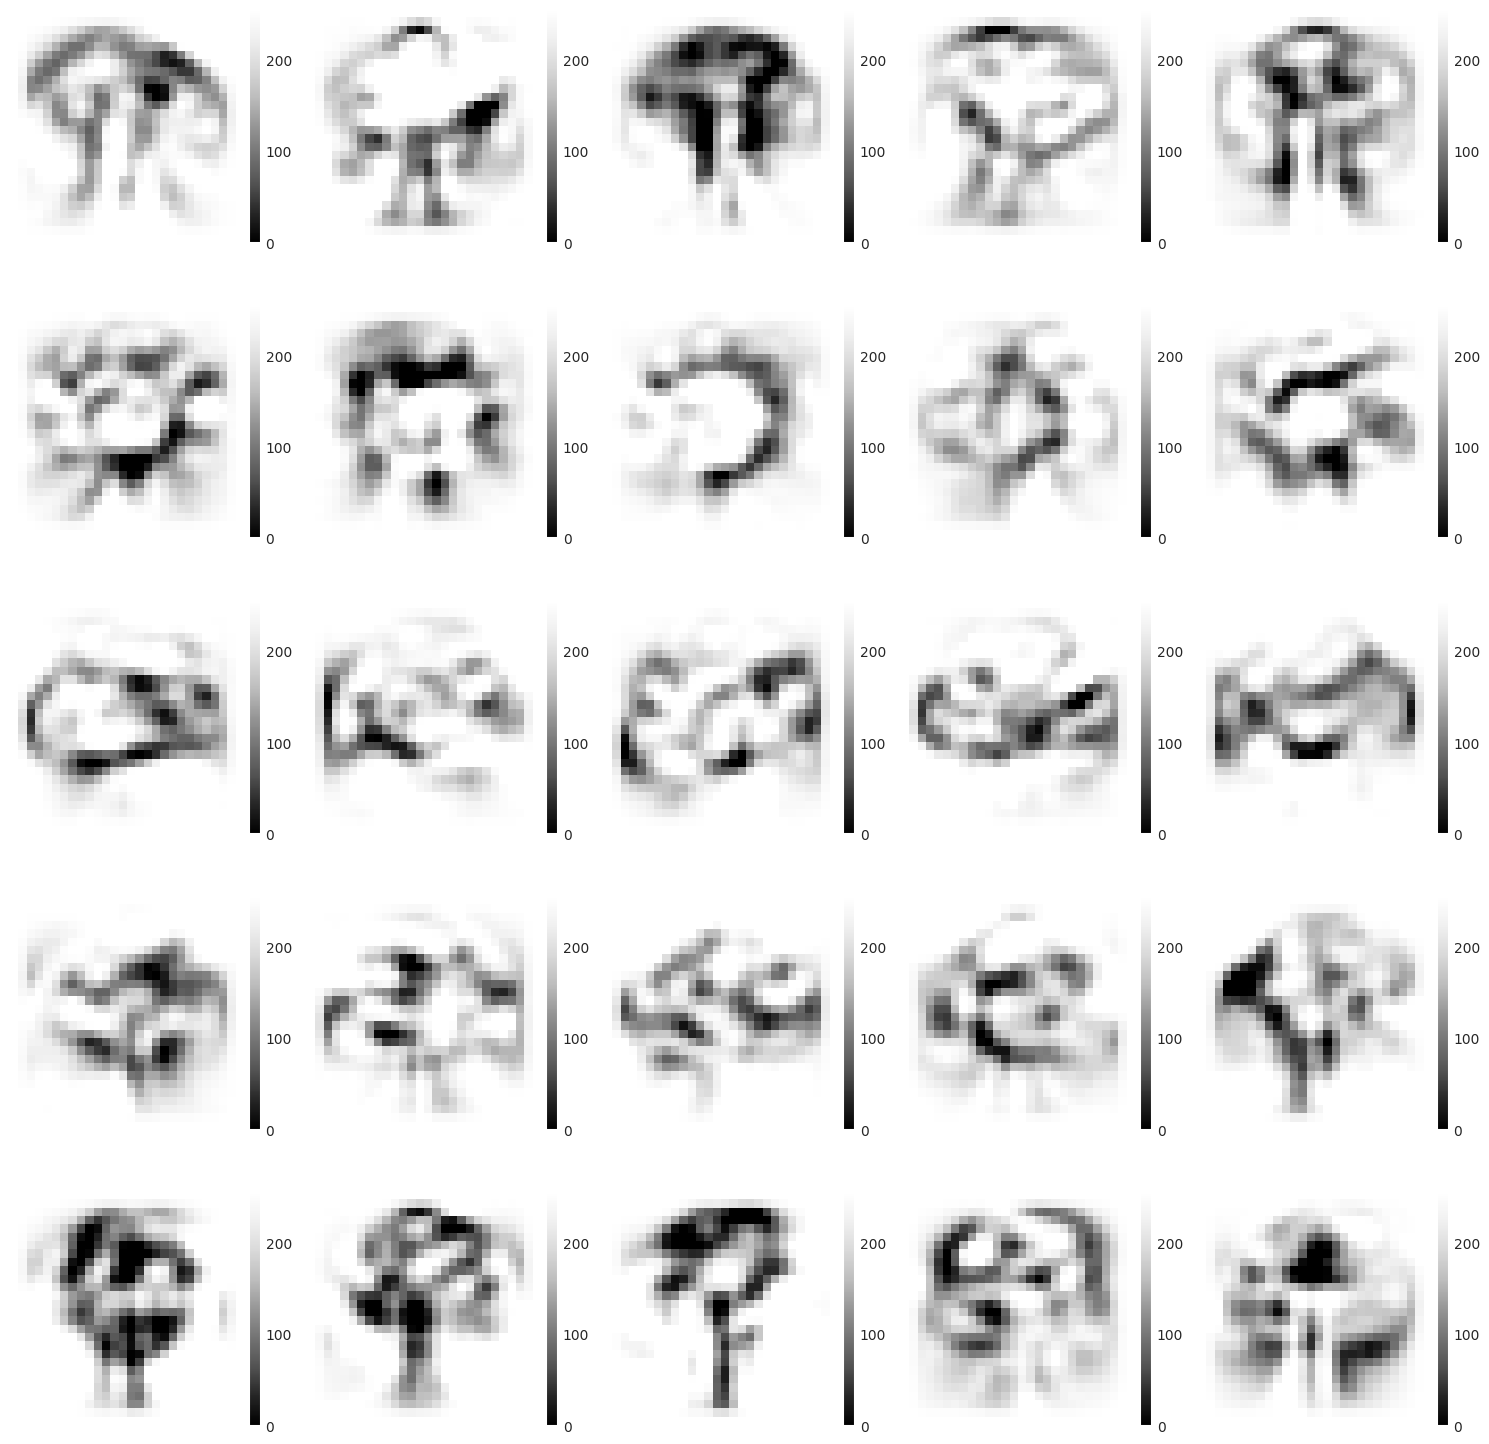

In [96]:
n_images_per_class = 5

random_img = []
for class_n in label_names:
    random_img += [i for i in sample_qda(lda_fitted[-1], class_n, sigma_scaler=1, k=n_images_per_class, idx=class_n)]

random_img = np.asarray(random_img)
print(random_img.shape)


random_img = lda_fitted[2].inverse_transform(random_img)
random_img = lda_fitted[1].inverse_transform(random_img)
random_img = random_img.reshape([-1,28,28]).transpose((1,2,0))

isns.ImageGrid(random_img, cmap="Greys_r", col_wrap=n_images_per_class, vmin=0, vmax=255)
plt.show()